**Step 1: Import Required Libraries**

In [ ]:
# 📦 Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from google.colab import files


**Step 2: Upload Dataset from Local System**

In [ ]:
# 📤 Step 2: Upload Dataset from Local System
print("📤 Please upload your dataset (CSV format only):")
uploaded = files.upload()

# Load uploaded file
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)
print("✅ Dataset Loaded Successfully!")
df.head()


📤 Please upload your dataset (CSV format only):


Saving german_credit_data.csv to german_credit_data.csv
✅ Dataset Loaded Successfully!


,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,3,NaN,little,1169,6,radio/TV
1,1,22,female,2,3,little,moderate,5951,48,radio/TV
2,2,49,male,1,3,little,NaN,2096,12,education
3,3,45,male,2,2,little,little,7882,42,furniture/equipment
4,4,53,male,2,2,little,little,4870,24,car


**Step 3: Add Dummy Target Column (defaulted)**

In [ ]:
# 🛠️ Step 3: Add Dummy Target Column (for testing)
# Since your dataset doesn't include a 'defaulted' column,
# we'll generate a fake one (0 = not defaulted, 1 = defaulted)
np.random.seed(42)
df['defaulted'] = np.random.randint(0, 2, size=len(df))
print("✅ Dummy 'defaulted' column added.")


✅ Dummy 'defaulted' column added.


**Step 4: Preprocess the Data (Cleaning & Encoding)**

In [ ]:
# 🧹 Step 4: Preprocess the Data
df.dropna(inplace=True)  # Drop rows with missing values

# One-hot encode categorical variables (like 'Sex', 'Housing', etc.)
df = pd.get_dummies(df, drop_first=True)

# Drop unnecessary index columns if present
if 'index' in df.columns:
    df.drop('index', axis=1, inplace=True)
if 'Unnamed: 0' in df.columns:
    df.drop('Unnamed: 0', axis=1, inplace=True)

# Split features and target
X = df.drop('defaulted', axis=1)
y = df['defaulted']

print("✅ Preprocessing complete.")
print("Features:", X.shape)
print("Target:", y.shape)


✅ Preprocessing complete.
Features: (522, 18)
Target: (522,)


**Step 5: Split and Scale the Data**

In [ ]:
# ✂️ Step 5: Split and Scale the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("✅ Data split and scaled.")


✅ Data split and scaled.


**Step 6: Train Machine Learning Models**

In [ ]:
# 🤖 Step 6: Train Models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

model_predictions = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    model_predictions[name] = y_pred
    print(f"✅ {name} trained successfully.")


✅ Logistic Regression trained successfully.
✅ Decision Tree trained successfully.
✅ Random Forest trained successfully.


**Step 7: Evaluate Model Performance**

In [ ]:
# 📈 Step 7: Evaluate Model Performance
for name, y_pred in model_predictions.items():
    print(f"\n🔍 {name}")
    print(classification_report(y_test, y_pred))
    auc = roc_auc_score(y_test, y_pred)
    print("ROC-AUC Score:", round(auc, 3))
    print("=" * 50)



🔍 Logistic Regression
              precision    recall  f1-score   support

           0       0.53      0.45      0.49        51
           1       0.55      0.63      0.59        54

    accuracy                           0.54       105
   macro avg       0.54      0.54      0.54       105
weighted avg       0.54      0.54      0.54       105

ROC-AUC Score: 0.54

🔍 Decision Tree
              precision    recall  f1-score   support

           0       0.49      0.51      0.50        51
           1       0.52      0.50      0.51        54

    accuracy                           0.50       105
   macro avg       0.50      0.50      0.50       105
weighted avg       0.51      0.50      0.50       105

ROC-AUC Score: 0.505

🔍 Random Forest
              precision    recall  f1-score   support

           0       0.58      0.55      0.57        51
           1       0.60      0.63      0.61        54

    accuracy                           0.59       105
   macro avg       0.59      0

**Step 8: Plot ROC Curves for All Models**

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


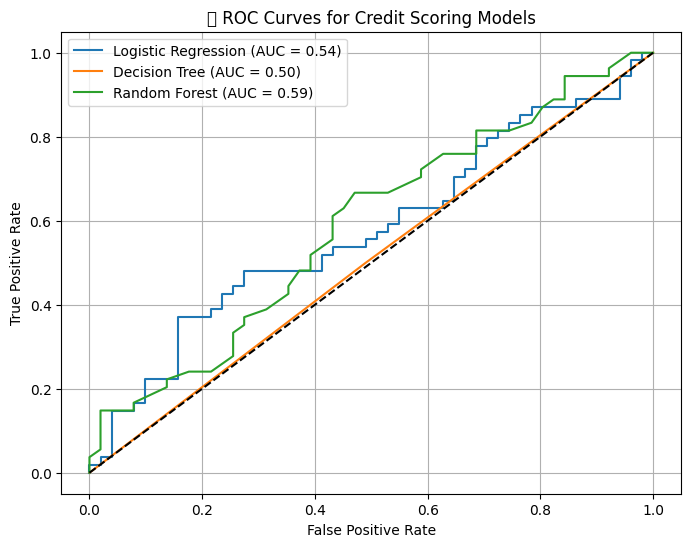

In [ ]:
# 📉 Step 8: Plot ROC Curves
plt.figure(figsize=(8, 6))

for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, model.predict(X_test))
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.title("📉 ROC Curves for Credit Scoring Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()


In [16]:
import joblib

# Save the trained model
joblib.dump(model, "credit_model.pkl")


['credit_model.pkl']

In [17]:
from google.colab import files
files.download("credit_model.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>